# map和filter

一个map+reduce+lambda的例子就好

python3里 map和filter都是返回的generator

In [1]:
from functools import reduce

print('reduce: ',reduce(lambda x,y:x+y,[1,2,3,4,5])) 

Dicts={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

def convert(x):
    return Dicts.get(x)

def str2int(a):
    return reduce(lambda x,y:x*10+y,map(lambda x:Dicts.get(x),a))


print('reduce+map+lambda: ', str2int('123'))



reduce:  15
reduce+map+lambda:  123


n次多项式,注意返回的是函数，闭包形式 ，

In [2]:
import math
import tkinter
import numpy as np
import matplotlib.pyplot as plt  

ModuleNotFoundError: No module named 'matplotlib'

In [188]:
def polyminal(*argc):
# first as x , second as n
    def x_n(a,n):
        while(n>0):
            a*=a
            n=n-1
        return a

    def inner(x):
        x_list = [x_n(x,n) for n in list(range(len(argc)-1,-1,-1))]
        # a*x^3 + b*x^2 + c*x + d
        return reduce(lambda x,y:x+y, (np.array(argc)*np.array(x_list)).tolist())

    return inner

计算a *x^3 +b*x^2 + c*x 

In [191]:
res = polyminal(1,2,3)(2); res

30

一个多项式生成函数，就这么简单

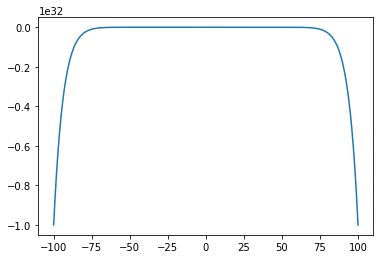

In [210]:
f=polyminal(-1,-2,3,-4,-5)
X=np.linspace(-100,100,400)
Y=[f(x) for x in X];
plt.plot(X,Y)

想起了深度学习网络为何可以近似模拟所有的非线性函数的原理，多项式也是可以模拟任何曲线的 

lambda+sort

In [181]:
L = [('Bob', 75), ('Adam', 92), ('Bart', 66), ('Lisa', 88)]

def sort_by_name(L):
    return sorted(L,key=lambda x:x[0])

def sort_by_score(L):
    return sorted(L,key=lambda x:-x[1])

In [182]:
sort_by_name(L)

[('Adam', 92), ('Bart', 66), ('Bob', 75), ('Lisa', 88)]

In [183]:
sort_by_score(L)

[('Adam', 92), ('Lisa', 88), ('Bob', 75), ('Bart', 66)]

# 迭代器，可迭代对象

In [5]:
from collections import *

In [6]:
l=[]
d={}
t=()
ll = [i for i in range(10)]
oo = (i for i in range(10))

In [7]:
isinstance(l,list)

True

In [8]:
isinstance(d,dict)

True

In [9]:
isinstance(d,Iterable)

True

In [10]:
isinstance(d,Iterator)

False

In [12]:
isinstance(ll,Iterator)

False

In [16]:
(i for i in range(1,10))

<generator object <genexpr> at 0x7f28084167d8>

In [15]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [222]:
isinstance(oo,Iterator)

True

In [223]:
next(oo)

0

In [224]:
next(oo)

1

iter将Iterable变成Iterator

In [225]:
iter_ll  = iter(ll)

In [226]:
isinstance(iter_ll,Iterator)

True

In [227]:
next(iter_ll)

0

In [228]:
next(iter_ll)

1

# 偏函数

functools.partial的作用就是，把一个函数的某些参数给固定住（也就是设置默认值），返回一个新的函数，调用这个新函数会更简单。

感觉很有用的样子,求偏导数

In [279]:
def f_x_y(x,y):
    return x**2 + y**2

In [283]:
import math
import tkinter
import numpy as np
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D

In [281]:
X=np.linspace(-10,10,20)
Y=np.linspace(-10,10,20)

In [282]:
X,Y=np.meshgrid(X,Y)
R=f_x_y(X,Y)

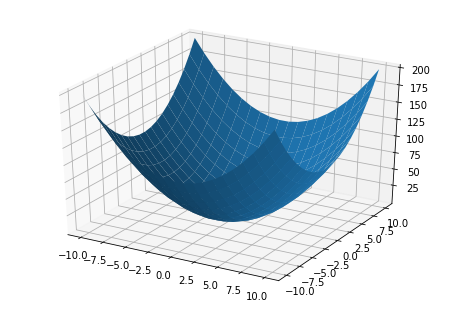

In [285]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, R,)


In [286]:
f_x = functools.partial(f_x_y,y=1)

In [294]:
X=np.linspace(-10,10,20)
Y=np.linspace(-10,10,20)

In [295]:
R=f_x(X)

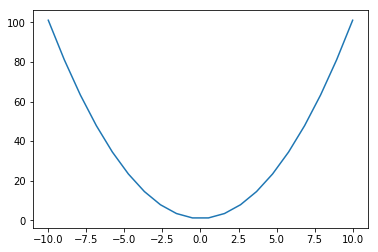

In [296]:
plt.plot(X,R)

# 函数参数

In [26]:
def func3(a,b,*args,**kwarg):
    print(a,b,args,kwarg)
# func3((1,2),9,c=12,13)
func3((1,2),9,12,c=13)

func3((1,2),9,12,c=13,d=14)
# **和上面的一致
func3((1,2),9,12,**{"c":13,"d":14})

# kwarg讲所有的关键字参数都放在dict里
func3(b=9,a=12,x=6,**{"c":13,"d":14})

func3(9,12,*[1,2,3], **{"c":13,"d":14})

(1, 2) 9 (12,) {'c': 13}
(1, 2) 9 (12,) {'c': 13, 'd': 14}
(1, 2) 9 (12,) {'c': 13, 'd': 14}
12 9 () {'x': 6, 'c': 13, 'd': 14}
9 12 (1, 2, 3) {'c': 13, 'd': 14}


# bytes 和bytesarray

都是存放字节数据的，唯一不同bytesarray存储可变的bytes,bytearray还具备像list一样的操作方法，比如pop，append等

In [320]:
b = b'123'

In [321]:
id(b)

140693169512040

In [322]:
b = b + b'4'

In [323]:
id(b)

140693168964792

'123'是不变的 b=b+b'4',b指向了另外的内存

In [335]:
br = bytearray(b'123')
br2 = bytearray(b'123')

In [332]:
id(br)

140693168633592

In [337]:
br.append(4)

In [338]:
id(br)

140693168635216

In [342]:
br.hex()

'31323304'

# memoryview

https://docs.python.org/3/library/stdtypes.html#memoryview

仅以python3为例子.

In [279]:
strs = b'12345'; 
bytesarrays = bytearray(b'12345')

如果要用memoryview 去引用一个object, 那么这个object 必须支持buffer protocol, python 中原生（built-in) 支持buffer protocol的obj 有 bytes 和bytearray.

In [280]:
ms = memoryview(strs)
mb = memoryview(bytesarrays)

1. memoryview相当于查看内存，但是str封装后的内存不能更改，bytesarray封装后的可以

In [281]:
ms.readonly

True

In [284]:
ms[0]=b'0'

TypeError: cannot modify read-only memory

In [295]:
ms.hex()

'3132333435'

In [282]:
mb.readonly

False

In [296]:
mb[0] = 49

In [297]:
mb.hex()

'3132333435'

In [299]:
mb.hex()

'3132333435'

In [300]:
mb[0] = 48

In [301]:
mb.hex()

'3032333435'

2. memoryview的切片不会产生切片复制.

In [303]:
mb[1:5].tobytes()

b'2345'

利用这个特点，可以实现类似c里数组的不浪费内存空间,且不会回收的高效做法:

In [3]:
buffer = memoryview(bytearray(10))

In [4]:
buffer.tobytes()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [7]:
for i in range(0,10):
    buffer[i] = 100

In [8]:
buffer.tobytes()

b'dddddddddd'

释放用relase:

In [9]:
buffer.release()

In [10]:
buffer[0]

ValueError: operation forbidden on released memoryview object

# 递归

## 汉诺塔

In [27]:
def move(n,a,b,c):
    if(n == 0):
        return;
    if(n == 1):
        #a挪到c 利用b
        print(a,'-->',c)
        return;
    if(n == 2):
        #2个的时候，先把a(上层)挪到b
        print(a,'-->',b)
        #再a(下层)挪到c
        print(a,'-->',c)
        #再考虑１个情况，即b借助a,挪到c
        move(n-1,b,a,c)
    if(n > 2):
        #如果先把下面n-1层　挪到b,
        move(n-1,a,c,b)
        #再把顶层挪到c
        print(a,'-->',c)
        move(n-1,b,a,c)



for i in list(range(1,4,1)):
    print('lvl ' ,i)
    move(i,'A','B','C')

SyntaxError: invalid syntax (<ipython-input-27-8c048e64d671>, line 5)